# 1. Explainable AI Algorithms

Explainable Artificial Intelligence (XAI) has been developed as a subfield of AI, focused on exposing complex AI and ML models to humans in a systematic and interpretable manner. XAI helps to understand, visualize and interpret machine learning models. XAI aims to make AI systems more transparent and understandable.

## a. Build a Machine Learning model for any problem (and dataset) you are interested in.


### Dataset
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Some important features:
1. failures
    * failures - number of past class failures 
    * (numeric: n if 1<=n<3, else 4)
2. absences
3. Mjob_health
    * mother's job: healthcare related
4. reason_reputation
    * reason to choose this school: reputation
5. freetime
    * freetime - free time after school (numeric: from 1 - very low to 5 - very high)
6. activites_yes
    * extra-curriculary activities
7. medu
    * mother's education
8. travel_time
    * home to school travel time
9. study_time
    * weekly study time


Grades:
1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)


We want to predict the final grade, G3. Since G1 and G2 has high correlations with G3, and we want to observe other features, we will drop G1 and G2.

### Gradient Boosting Regressor

In [128]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("student-mat.csv")

# we want to convert categorical data into numerical data
data = pd.get_dummies(data, drop_first=True)

#we want to predict the final grade, G3
X = data.drop(["G1","G2","G3"], axis=1)
y = data["G3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.02, max_depth=4) #loss="ls"
gbm.fit(X_train, y_train)
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


## b. List and explain at least 2 XAI algorithms (SHAPASH, OmniXAI, LIME, ELI5, SHAP, InterpretML)

### SHAP (SHAPley Additive exPlanations)
* her feature'un, tahmine olan etkisinin değerini hesaplayıp görselleştirmemize yardımcı olan bir araçtır
* birden fazla makine öğrenmesi kütüphanesi ile beraber kullanılabilir: Scikit-Learn, Tensorflow, Pytorch gibi

SHAP kullanılarak yapılmış örnek bir görselleştirme:
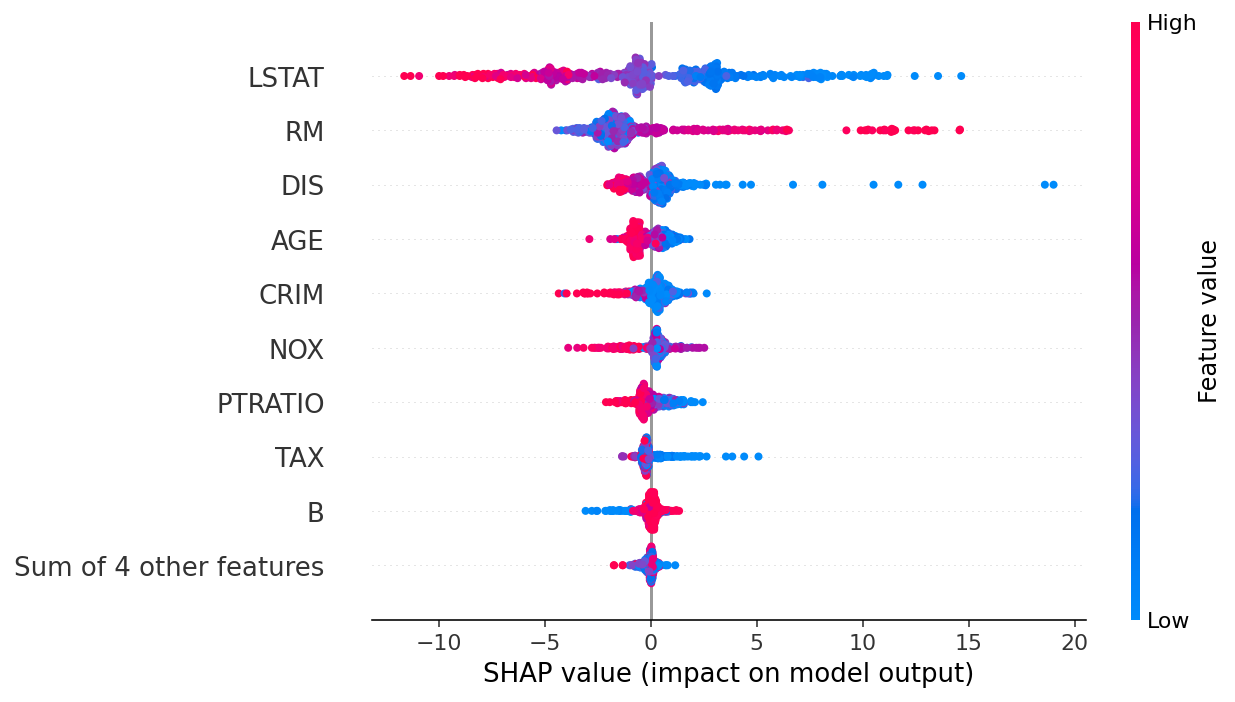

### LIME (Local Interpretable Model-agnostic Explanations)
* ana modelin davranışlarını izleyerek anlaşılabilir ve yorumlanabilir bir model oluşturmaya çalışır
* lineer regresyon gibi modeller dataset'in üzerinde kullanılarak ana modelin davranışları anlaşılmaya çalışılır

## c. Write a code snippet using python to show XAI algorithm usage. Use one of the XAI algorithms to explain the model you built.


In [129]:
import shap
import lime
import lime.lime_tabular
import numpy as np

explainer = shap.Explainer(gbm)

shap_values = explainer(X_test)

## d. Support your solution with plot(s) and model evaluation metrics.


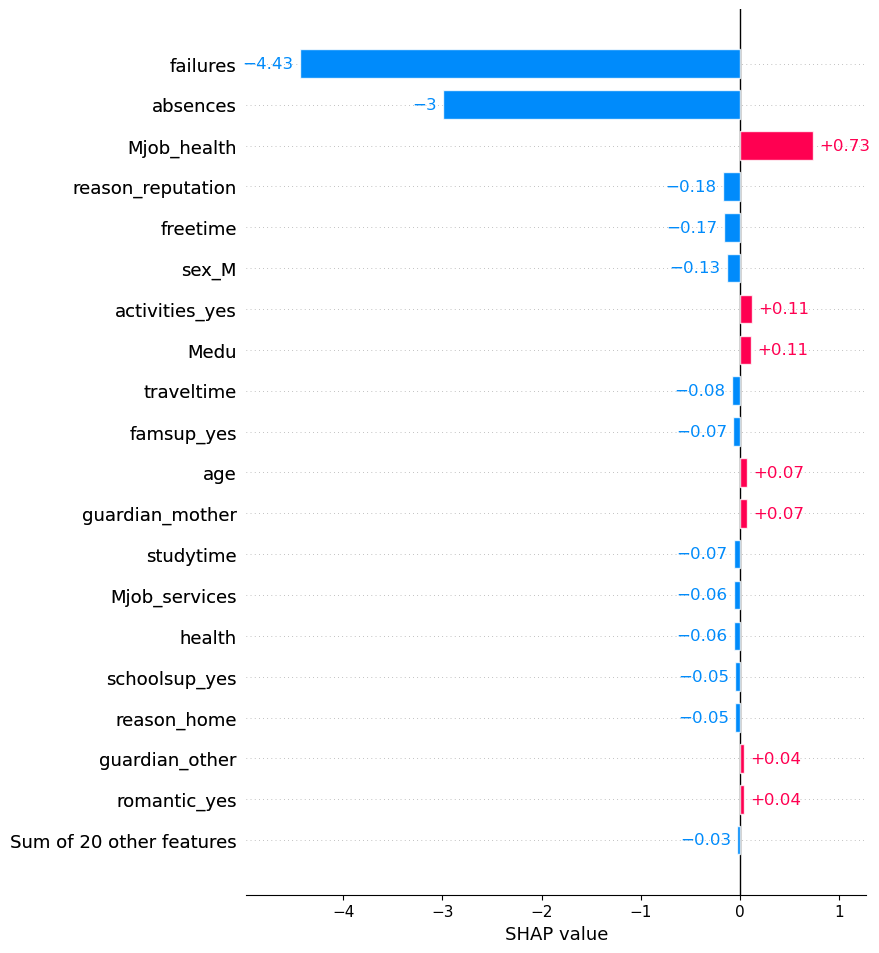

In [130]:
shap.plots.bar(shap_values[0], max_display=20)

In [131]:
#model evaluation
y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

MSE:  9.05746540080442
R^2:  0.33750976763916785
